# **Final Project**
Group 2

Benjamin Bearman, Carrima Hewitt, Franchesca Mieles, Ariel Pita, Daniel Rawana

ISM6644

Tala Mirzaei

Feb. 22, 2025

### Import Libraries

In [204]:
import pandas as pd # Use this for dataframes and importing csv
import numpy as np #
import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

### Read the CSV and create dataframe

In [205]:
df = pd.read_csv('Consumer Data Project.csv') #import data from csv
df.head() #take a quick look at first 5 rows

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,Unnamed: 9,Unnamed: 10
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0,NaN,NaN
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0,NaN,NaN
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0,NaN,NaN
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0,NaN,NaN
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0,NaN,NaN




---


# Data Cleaning

### Remove empty columns

In [206]:
df = df.iloc[0:, 0:9] #trim off the last 2 columns from the dataframe
df.head()

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0


### View dataframe properties

In [207]:
df.info() #looking for columns of missing data. found 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Customer Gender       9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9990 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction Score    9991 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [208]:
#Viewing the Service column value counts
df['Service'].value_counts()

4G          3343
phone       3290
fiber       1694
landline    1666
Name: Service, dtype: int64

In [209]:
#Viewing the Customer Gender column value counts
df['Customer Gender'].value_counts()

F    5075
M    4918
Name: Customer Gender, dtype: int64

In [210]:
#Viewing the Region column value counts
df['Region'].value_counts()

Central    4933
North      2590
South      2470
Name: Region, dtype: int64

In [211]:
#Renaming columns to remove spaces or simplify titles
df.rename(columns={'Customer Gender':'Sex', 'Satisfaction Score':'Satisfaction'},

inplace=True)

df.head(100)

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0
...,...,...,...,...,...,...,...,...,...
95,landline,32,7/13/2010 10:27,F,Central,1,54.0,0.01,8.0
96,4G,63,7/14/2010 10:27,M,North,10,45.0,0.25,3.0
97,4G,73,7/14/2010 10:27,F,South,5,58.0,0.11,4.0
98,4G,33,7/14/2010 10:27,F,Central,1,51.0,0.04,6.0


In [212]:
#Replacing any NaN values with the average of all non-NaN values
#Choosing the average value should prevent median affecting our dataset during standardization
df['AverageBill'].fillna(df['AverageBill'].mean(),inplace=True)
# make sure it worked.
df['AverageBill'].isna().sum()

0

In [213]:
#Replacing any NaN values with the average of all non-NaN values
df['Satisfaction'].fillna(df['Satisfaction'].mean(),inplace=True)
# make sure it worked.
df['Satisfaction'].isna().sum()

df.head(20)

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.000000,0.32,5.000000
1,4G,74,6/23/2010 10:27,M,North,0,48.000000,0.02,3.000000
2,phone,34,6/23/2010 10:27,F,Central,0,34.000000,0.02,4.000000
3,phone,60,6/24/2010 10:27,M,North,5,70.000000,0.23,5.000000
4,landline,29,6/24/2010 10:27,M,Central,5,40.000000,0.09,5.000000
5,phone,38,6/24/2010 10:27,M,Central,0,71.505105,0.70,2.000000
6,phone,61,6/25/2010 10:27,F,North,0,98.000000,0.03,7.000000
7,fiber,76,6/25/2010 10:27,M,Central,0,105.000000,0.01,4.000000
8,phone,71,6/25/2010 10:27,M,Central,0,103.000000,0.80,2.000000
9,landline,61,6/25/2010 10:27,F,Central,0,85.000000,0.00,9.000000


In [214]:
#Dropping any duplicates
df.drop_duplicates()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0
...,...,...,...,...,...,...,...,...,...
9988,landline,72,12/13/2015 10:27,M,North,1,39.0,0.00,4.0
9989,4G,29,12/13/2015 10:27,F,Central,0,86.0,0.00,7.0
9990,phone,41,12/14/2015 10:27,M,Central,6,50.0,0.00,5.0
9991,4G,43,12/14/2015 10:27,F,Central,1,67.0,0.00,7.0


In [215]:
#Viewing the updated dataset
#looks like we didn't have any duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Sex                   9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9993 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction          9993 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [216]:
#Converting various Date formats into DataTime format
#We may want to use this later to determine how long someone has been a customer.
df["CustomerSince"] = pd.to_datetime(df["CustomerSince"], errors="coerce")

df.head(15)

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.000000,0.32,5.0
1,4G,74,2010-06-23 10:27:00,M,North,0,48.000000,0.02,3.0
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.000000,0.02,4.0
3,phone,60,2010-06-24 10:27:00,M,North,5,70.000000,0.23,5.0
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.000000,0.09,5.0
5,phone,38,2010-06-24 10:27:00,M,Central,0,71.505105,0.70,2.0
6,phone,61,2010-06-25 10:27:00,F,North,0,98.000000,0.03,7.0
7,fiber,76,2010-06-25 10:27:00,M,Central,0,105.000000,0.01,4.0
8,phone,71,2010-06-25 10:27:00,M,Central,0,103.000000,0.80,2.0
9,landline,61,2010-06-25 10:27:00,F,Central,0,85.000000,0.00,9.0


In [217]:
#Viewing the updated dataset
# Column 'CustomerSince' changed from an object to datetime64[ns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Service               9993 non-null   object        
 1   Age                   9993 non-null   int64         
 2   CustomerSince         9993 non-null   datetime64[ns]
 3   Sex                   9993 non-null   object        
 4   Region                9993 non-null   object        
 5   SupportCallsLastYear  9993 non-null   int64         
 6   AverageBill           9993 non-null   float64       
 7   ChurnIndicator        9993 non-null   float64       
 8   Satisfaction          9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 702.8+ KB


### EDA

Evaulating Data using the Zscore:
Z-scores enable meaningful comparison of individual observations across different populations or time periods.
Z-scores maintain the distribution shape while transforming to a mean of 0 and standard deviation of 1.
Standardization helps identify true outliers by showing how many standard deviations an observation is from the mean.
We evaluated the Zscore of features: Age, Satisfaction, ChurnIndicator and AverageBill

In [218]:
#Calculating the z score for Age
df['z_score_A'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

threshold = 3

df['is_outlier_A'] = df['z_score_A'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False


In [219]:
#Viewing if there are any outliers in Age
df['is_outlier_A'].value_counts()

False    9993
Name: is_outlier_A, dtype: int64

We used Boxplots as they clearly mark outliers as individual points beyond the normal range, making it easy to spot unusual data points that might need further investigation.

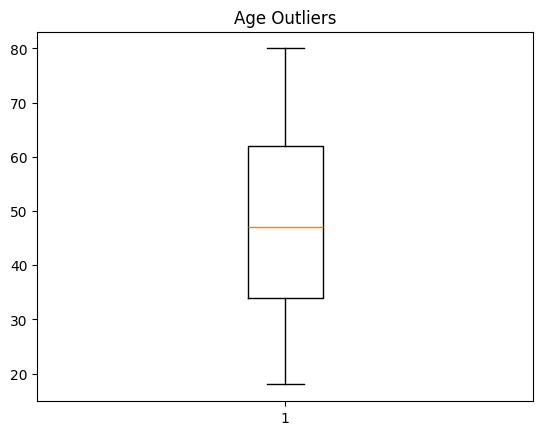

In [220]:
# Visualizing Age Outliers Using Box Plot
# Plot a boxplot to visualize the outliers
plt.boxplot(df['Age']) 
plt.title('Age Outliers')
plt.show() 

In [221]:
#Calculating the z score for Average Bill
df['z_score_AB'] = (df['AverageBill'] - df['AverageBill'].mean()) / df['AverageBill'].std()

threshold = 3

df['is_outlier_AB'] = df['z_score_AB'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False


In [222]:
df['is_outlier_AB'].value_counts()

False    9993
Name: is_outlier_AB, dtype: int64

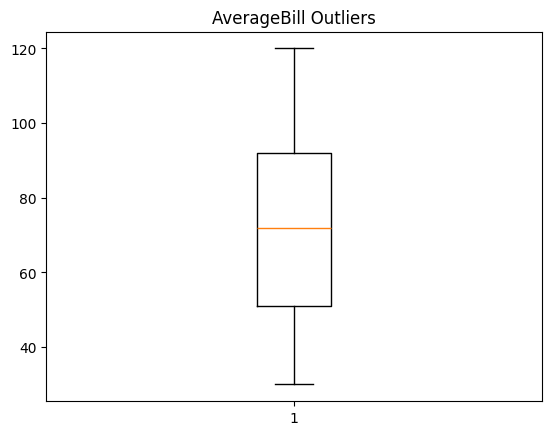

In [223]:
# Visualizing Outliers Using Box Plot
# Plot a boxplot to visualize the outliers
plt.boxplot(df['AverageBill']) 
plt.title('AverageBill Outliers')
plt.show() 

In [224]:
#Calculating the z score for ChurnIndicator
df['z_score_CI'] = (df['ChurnIndicator'] - df['ChurnIndicator'].mean()) / df['ChurnIndicator'].std()

threshold = 3

df['is_outlier_CI'] = df['z_score_CI'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False


In [225]:
#Viewing if there are any outliers in ChurnIndicator
df['is_outlier_CI'].value_counts()

False    9616
True      377
Name: is_outlier_CI, dtype: int64

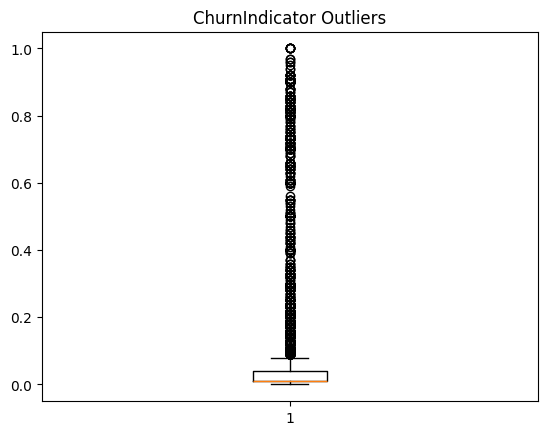

In [226]:
# Visualizing ChurnIndicator Outliers Using Box Plot
import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['ChurnIndicator']) 
plt.title('ChurnIndicator Outliers')
plt.show() 

We replaced outliers within features with the median to stabilize the dataset and prevent extreme values from impacting the results. By replacing them with the median value ensures that no data points are lost.

In [227]:
# Handling Outliers in ChurnIndicator by Replacing Them with the Median.

median_value = df['ChurnIndicator'].median()

df['ChurnIndicator'] = np.where(df['is_outlier_CI'], median_value, df['ChurnIndicator']) 

#Display the dataframe handling Outliers by Replacing Them with the Median
df

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,1.417360,False,-1.368025,False,-0.401821,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-1.117500,False,0.610039,False,-0.401821,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.410097,False,-0.905074,False,-0.401821,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.292197,False,-0.189604,False,-0.401821,False


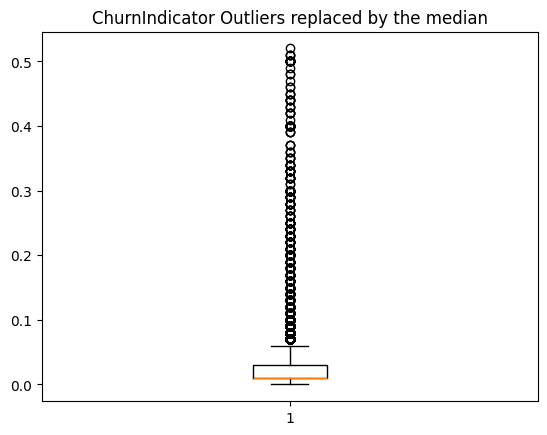

In [228]:
# Visualizing Outliers Using Box Plot

# Plot a boxplot to visualize the outliers replaced by the Median
plt.boxplot(df['ChurnIndicator']) 
plt.title('ChurnIndicator Outliers replaced by the median')
plt.show() 

In [229]:
#Calculating the z score for Satisfaction
df['z_score_S'] = (df['Satisfaction'] - df['Satisfaction'].mean()) / df['Satisfaction'].std()

threshold = 3

df['is_outlier_S'] = df['z_score_S'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False


In [230]:
#viewing if there are any outliers in Satisfaction
df['is_outlier_S'].value_counts()

False    9993
Name: is_outlier_S, dtype: int64

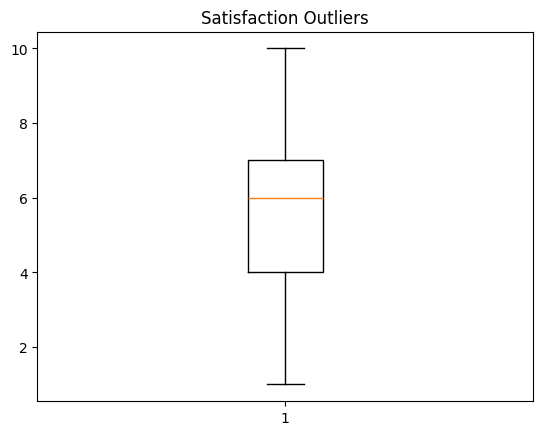

In [231]:
# Visualizing Satisfaction Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['Satisfaction']) 
plt.title('Satisfaction Outliers')
plt.show() 

In [232]:
#Calculating the z score for Satisfaction
df['z_score_SCLY'] = (df['SupportCallsLastYear'] - df['SupportCallsLastYear'].mean()) / df['SupportCallsLastYear'].std()

threshold = 3

df['is_outlier_SCLY'] = df['z_score_SCLY'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S,z_score_SCLY,is_outlier_SCLY
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False,0.036255,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False,-0.755650,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False,-0.755650,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False,1.224113,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False,1.224113,False


In [233]:
#viewing if there are any outliers in SupportCallsLastYear
df['is_outlier_SCLY'].value_counts()

False    9886
True      107
Name: is_outlier_SCLY, dtype: int64

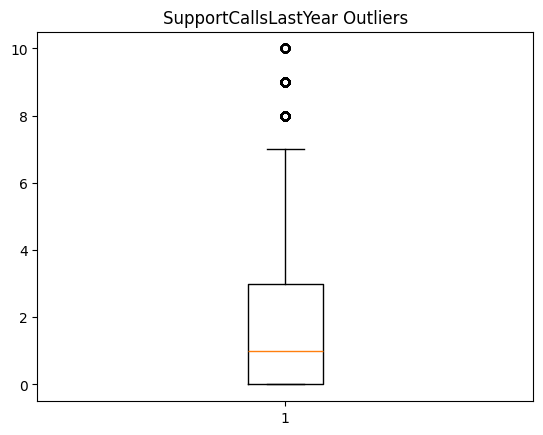

In [234]:
# Visualizing Outliers Using Box Plot


# Plot a boxplot to visualize the outliers
plt.boxplot(df['SupportCallsLastYear']) 
plt.title('SupportCallsLastYear Outliers')
plt.show() 

In [235]:
# Handling SupportCallsLastYear Outliers by Replacing Them with the Median.

median_value = df['SupportCallsLastYear'].median()

df['SupportCallsLastYear'] = np.where(df['is_outlier_SCLY'], median_value, df['SupportCallsLastYear']) 

#Display the dataframe handling Outliers by Replacing Them with the Median
df

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S,z_score_SCLY,is_outlier_SCLY
0,fiber,29,2010-06-23 10:27:00,M,North,2.0,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False,0.036255,False
1,4G,74,2010-06-23 10:27:00,M,North,0.0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False,-0.755650,False
2,phone,34,2010-06-23 10:27:00,F,Central,0.0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False,-0.755650,False
3,phone,60,2010-06-24 10:27:00,M,North,5.0,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False,1.224113,False
4,landline,29,2010-06-24 10:27:00,M,Central,5.0,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False,1.224113,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1.0,39.0,0.00,4.0,1.417360,False,-1.368025,False,-0.401821,False,-0.847123,False,-0.359698,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0.0,86.0,0.00,7.0,-1.117500,False,0.610039,False,-0.401821,False,0.615482,False,-0.755650,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6.0,50.0,0.00,5.0,-0.410097,False,-0.905074,False,-0.401821,False,-0.359588,False,1.620066,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1.0,67.0,0.00,7.0,-0.292197,False,-0.189604,False,-0.401821,False,0.615482,False,-0.359698,False


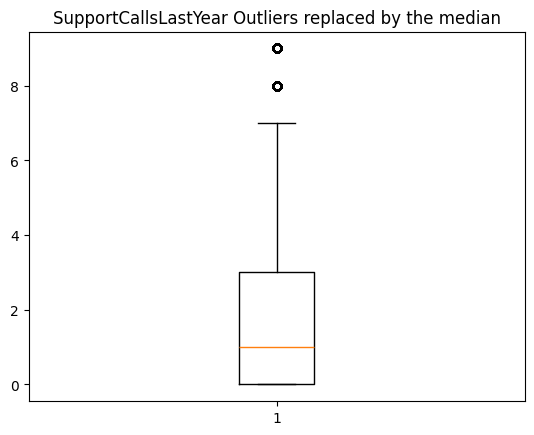

In [236]:
# Visualizing Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers replaced by the Median
plt.boxplot(df['SupportCallsLastYear']) 
plt.title('SupportCallsLastYear Outliers replaced by the median')
plt.show() 

Standardizing a feature scales data to have a mean of zero and a standard deviation of one. This prevents features with larger values from dominating the model. It also improves the performance of algorithms that are sensitive to feature scales.

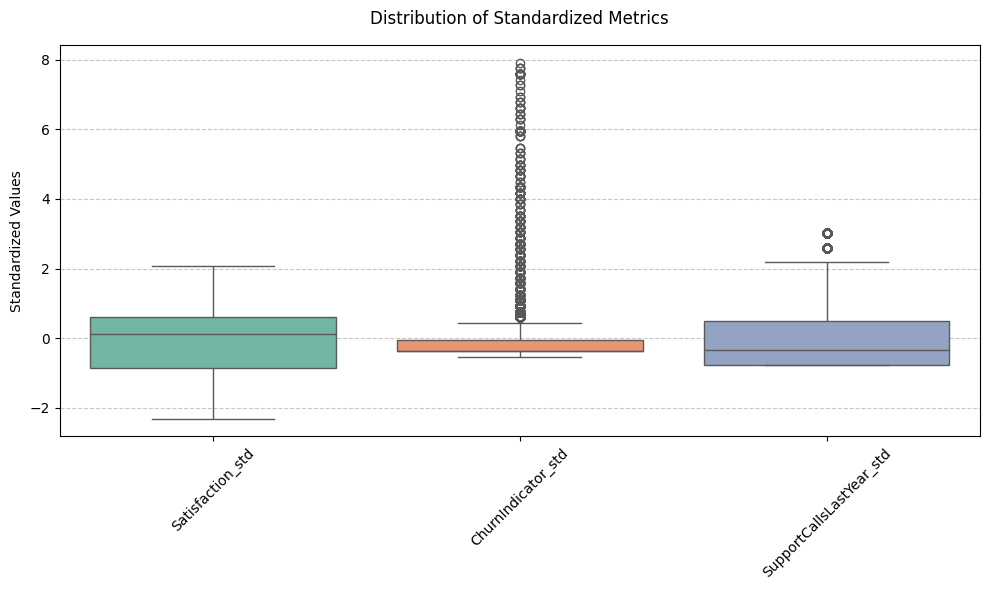

In [237]:
# Standardizing the columns
from sklearn.preprocessing import StandardScaler
#Import Seaborn
import seaborn as sns
# Create a scaler object
scaler = StandardScaler()

# Select the columns you want to standardize
newdf = ['Satisfaction', 'ChurnIndicator', 'SupportCallsLastYear']

# Create standardized versions of these columns
df[['Satisfaction_std', 'ChurnIndicator_std', 'SupportCallsLastYear_std']] = scaler.fit_transform(df[newdf])

# Now create the boxplot
plt.figure(figsize=(10, 6))
stats_to_plot = ['Satisfaction_std', 'ChurnIndicator_std', 'SupportCallsLastYear_std']
sns.boxplot(data=df[stats_to_plot], palette='Set2')
plt.title("Distribution of Standardized Metrics", pad=15, fontsize=12)
plt.ylabel("Standardized Values")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

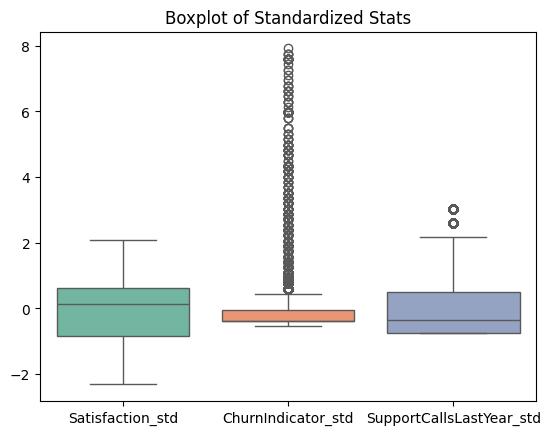

In [238]:
# Boxplots: Distribution of the standardized stats
plt.figure()
stats_to_plot = ['Satisfaction_std', 'ChurnIndicator_std', 'SupportCallsLastYear_std']
sns.boxplot(data=df[stats_to_plot], palette='Set2')
plt.title("Boxplot of Standardized Stats")
plt.show()

In [239]:
# Transform the data into a suitable format for analysis.
df
df_encoded = pd.get_dummies(df, columns=['Service', 'Sex', 'Region'])
df_encoded
df = df_encoded

# Exploratory Data Analysis (EDA)

In [240]:
#Display information about dataset:
#print(df.head)

#Describe Shape
print("SHAPE:")
print(df.shape)

#Displays a summary of statistics 
print("\nSTATISTICS:")
print(df.describe())

SHAPE:
(9993, 28)

STATISTICS:
               Age  SupportCallsLastYear  AverageBill  ChurnIndicator  \
count  9993.000000           9993.000000  9993.000000     9993.000000   
mean     47.956670              1.812068    71.505105        0.033259   
std      16.963456              2.382614    23.760614        0.061488   
min      18.000000              0.000000    30.000000        0.000000   
25%      34.000000              0.000000    51.000000        0.010000   
50%      47.000000              1.000000    72.000000        0.010000   
75%      62.000000              3.000000    92.000000        0.030000   
max      80.000000              9.000000   120.000000        0.520000   

       Satisfaction     z_score_A    z_score_AB    z_score_CI     z_score_S  \
count   9993.000000  9.993000e+03  9.993000e+03  9.993000e+03  9.993000e+03   
mean       5.737564  1.137665e-16  1.340311e-16 -2.275329e-17 -1.734939e-16   
std        2.051135  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+0

In [241]:
print("ABOUT THE DATASET")
print(df.info())

print("\nCOLUMNS:")
print(df.columns.tolist())

ABOUT THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Age                       9993 non-null   int64         
 1   CustomerSince             9993 non-null   datetime64[ns]
 2   SupportCallsLastYear      9993 non-null   float64       
 3   AverageBill               9993 non-null   float64       
 4   ChurnIndicator            9993 non-null   float64       
 5   Satisfaction              9993 non-null   float64       
 6   z_score_A                 9993 non-null   float64       
 7   is_outlier_A              9993 non-null   bool          
 8   z_score_AB                9993 non-null   float64       
 9   is_outlier_AB             9993 non-null   bool          
 10  z_score_CI                9993 non-null   float64       
 11  is_outlier_CI             9993 non-null   bool          
 12  z_

# Data Visualization

## Import Data Visualization Libraries

In [242]:
#Import Matplotlib
import matplotlib.pyplot as plt

#Import Seaborn
import seaborn as sns

## Customer Demographics

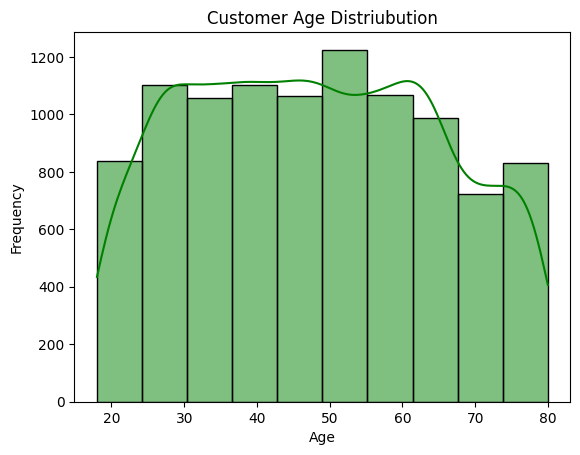

In [243]:
# Age Distribution using Seaborn

# Create a histogram
sns.histplot(df['Age'], bins=10, kde=True, color='green')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distriubution')

plt.show()

### Insights
Age is normally distributed, though most customers are around 50 years old (1200) and majority are around 30-60.

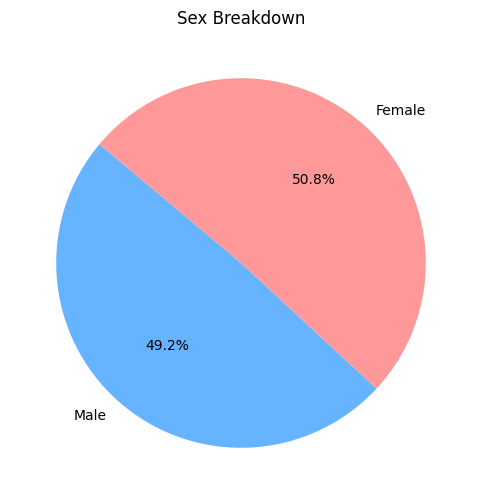

In [245]:
# Sex Breakdown using Matplotlib
# Count occurrences of each sex
males = df['Sex_M'].sum()
females = df['Sex_F'].sum()

# Create a pie chart
plt.figure(figsize=(6,6)) # Constrain pie chart dimensions to 6inches in height and width
# Uses the sexes as labels, display as percent with one decimal, rotate the chart 140 deg
plt.pie([males, females], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Sex Breakdown')
plt.show()

### Insights
The customer base is about evenly distributed between males and females in terms of Sex.

## Regional Differences

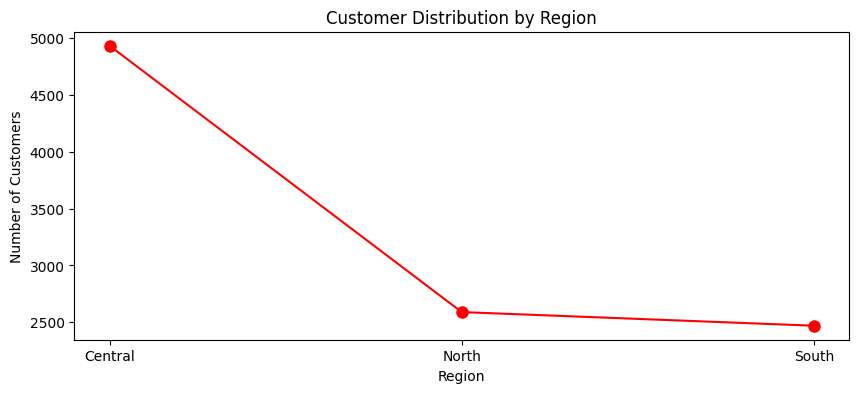

In [246]:
# Customer Distribution by Region using Matplotlib
# Count customers per region
central = df['Region_Central'].sum()
north = df['Region_North'].sum()  
south = df['Region_South'].sum()

# Data
counts = [central, north, south]
regions = ['Central', 'North', 'South']

# Create a slope chart
plt.figure(figsize=(10, 4))
plt.plot(regions, counts, marker='o', linestyle='-', color='r', markersize=8)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Region')
plt.show()

### Insights
The Central region commands nearly half the customer base (49.4%), while North (25.9%) and South (24.7%) regions share the remainder almost equally.

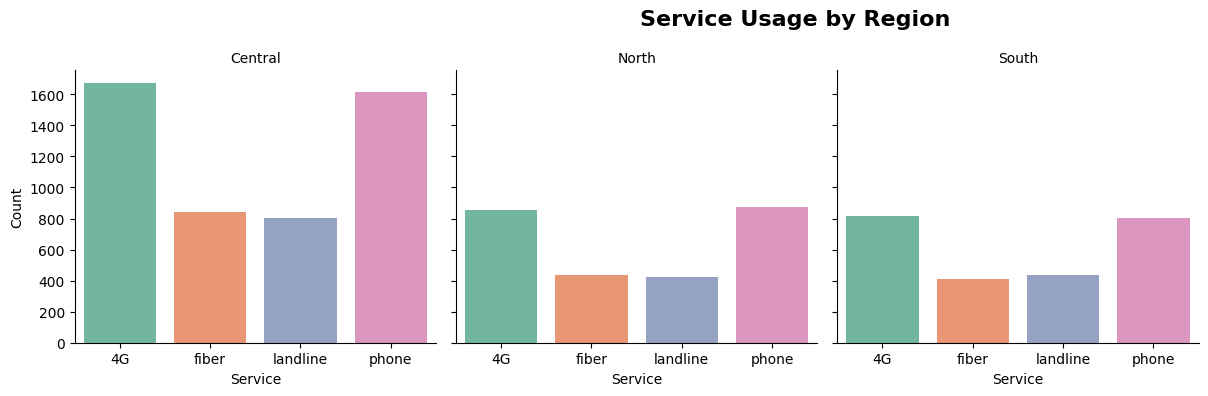

In [247]:
# Recombine dummy columns to make process smoother
merged_df = pd.DataFrame()
merged_df['Region'] = df.filter(regex='Region').idxmax(axis=1).str.replace('Region_', '')
merged_df['Service'] = df.filter(regex='Service').idxmax(axis=1).str.replace('Service_', '')

# Count occurrences of each service by region and convert to grouped dataframe
service_by_region = merged_df.groupby(['Region', 'Service']).size().unstack(fill_value=0)
service_by_region = service_by_region.reset_index().melt(id_vars='Region', var_name='Service', value_name='Count')

# Define a color palette with distinct colors for each service
palette = sns.color_palette('Set2', len(service_by_region['Service'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(service_by_region, col='Region', col_wrap=4, height=4)
g.map_dataframe(sns.barplot, x='Service', y='Count', hue='Service', palette=palette, legend=False)

# Add titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Service', 'Count')

# Add a centered title
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Service Usage by Region', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


### Insights
Central region has the highest service adoption rate, representing the strongest market. Mobile services (Phone/4G) are dominant, having twice the adoption of fixed-line services (fiber/landline) which makes sense since most people getting online for the first time tend to use mobile services.

## Customer Behavior

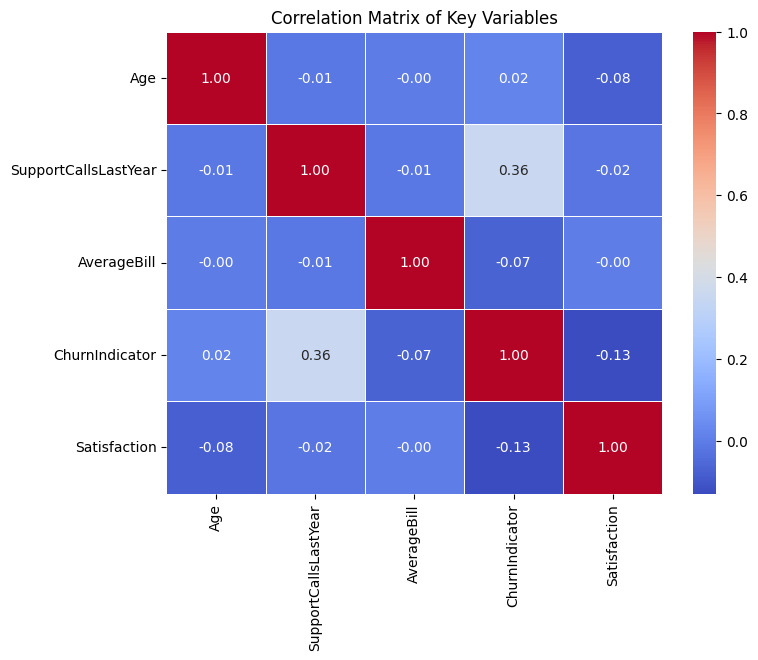

In [248]:
# Compute correlation matrix (for numerical variables only)
key_vars = pd.DataFrame({
    'Age': df['Age'],
    'SupportCallsLastYear': df['SupportCallsLastYear'],
    'AverageBill': df['AverageBill'],
    'ChurnIndicator': df['ChurnIndicator'],
    'Satisfaction': df['Satisfaction']
})
correlation_matrix = key_vars.corr()

# Generate a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

### Insights
Support Calls and Churn Indicator have the strongest correlation. This suggests that customers who make more support calls are more likely to churn. Similarly, Satisfaction and Churn Indicator have a negative correlation which implies that customers with higher satisfaction are less likely to churn.

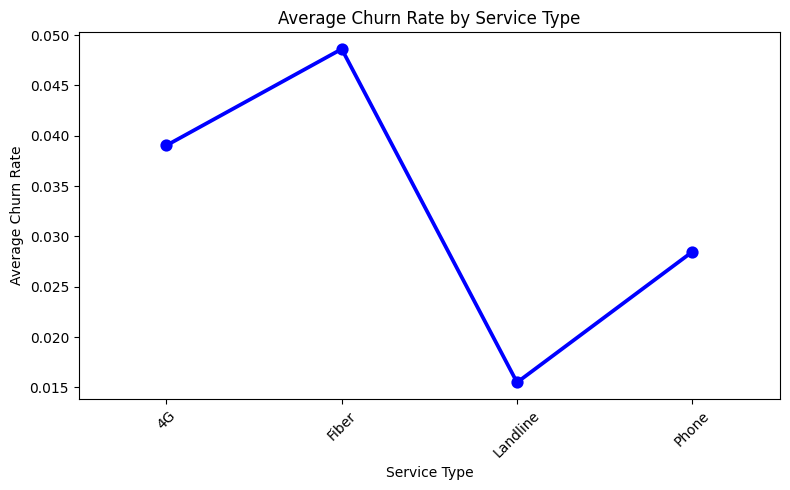

In [249]:
# Identify dummy columns for service
service_columns = [col for col in df.columns if 'Service_' in col]

# Calculate average churn rate for each service type (dummy variable)
churn_by_service = df[service_columns].T.dot(df['ChurnIndicator']) / df[service_columns].sum()

# Plot: Churn by Service Type using Point Plot
plt.figure(figsize=(8, 5))
x = churn_by_service.index
sns.pointplot(x=x, y=churn_by_service.values, color='blue', markers='o', linestyles='-', dodge=True)

# Customize labels
plt.title('Average Churn Rate by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Churn Rate')
plt.xticks(ticks=range(len(x)), labels=['4G', 'Fiber', 'Landline', 'Phone'], rotation=45)

plt.tight_layout()
plt.show()

### Insights
The service with highest average churn rate is Fiber, followed by 4G and Phone with Landline having the lowest rate.

/var/folders/20/v7_2zbh95sq7pb80z9mght_m0000gn/T/ipykernel_45622/2684208.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  serv.set_xticklabels(['Central', 'North', 'South'])


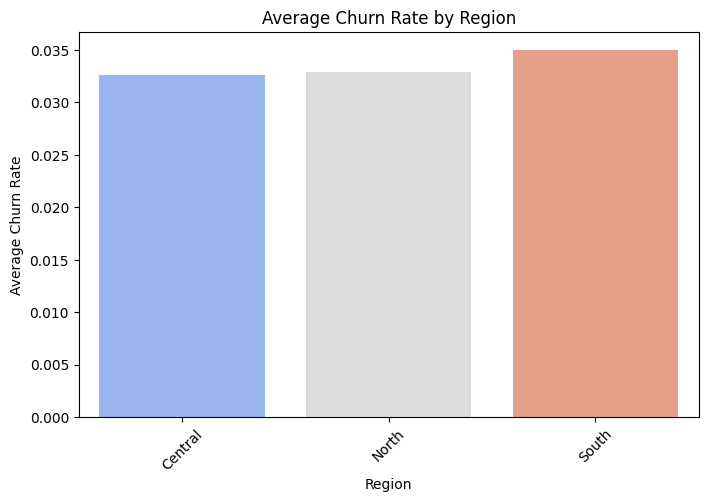

In [250]:
# Identify dummy columns for region
service_columns = [col for col in df.columns if 'Region_' in col]

# Calculate average churn rate for each service type (dummy variable)
churn_by_service = df[service_columns].T.dot(df['ChurnIndicator']) / df[service_columns].sum()

# Plot: Churn by Service Type
plt.figure(figsize=(8, 5))
x = churn_by_service.index
serv = sns.barplot(x=x, y=churn_by_service.values, hue=x, palette='coolwarm')
serv.set_xticklabels(['Central', 'North', 'South'])
plt.title('Average Churn Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Insights
The South region has the highest overall average churn rate while Central and North regions have similar churn rates

# Descriptive Statistics and Data Summarization

## Data Summary

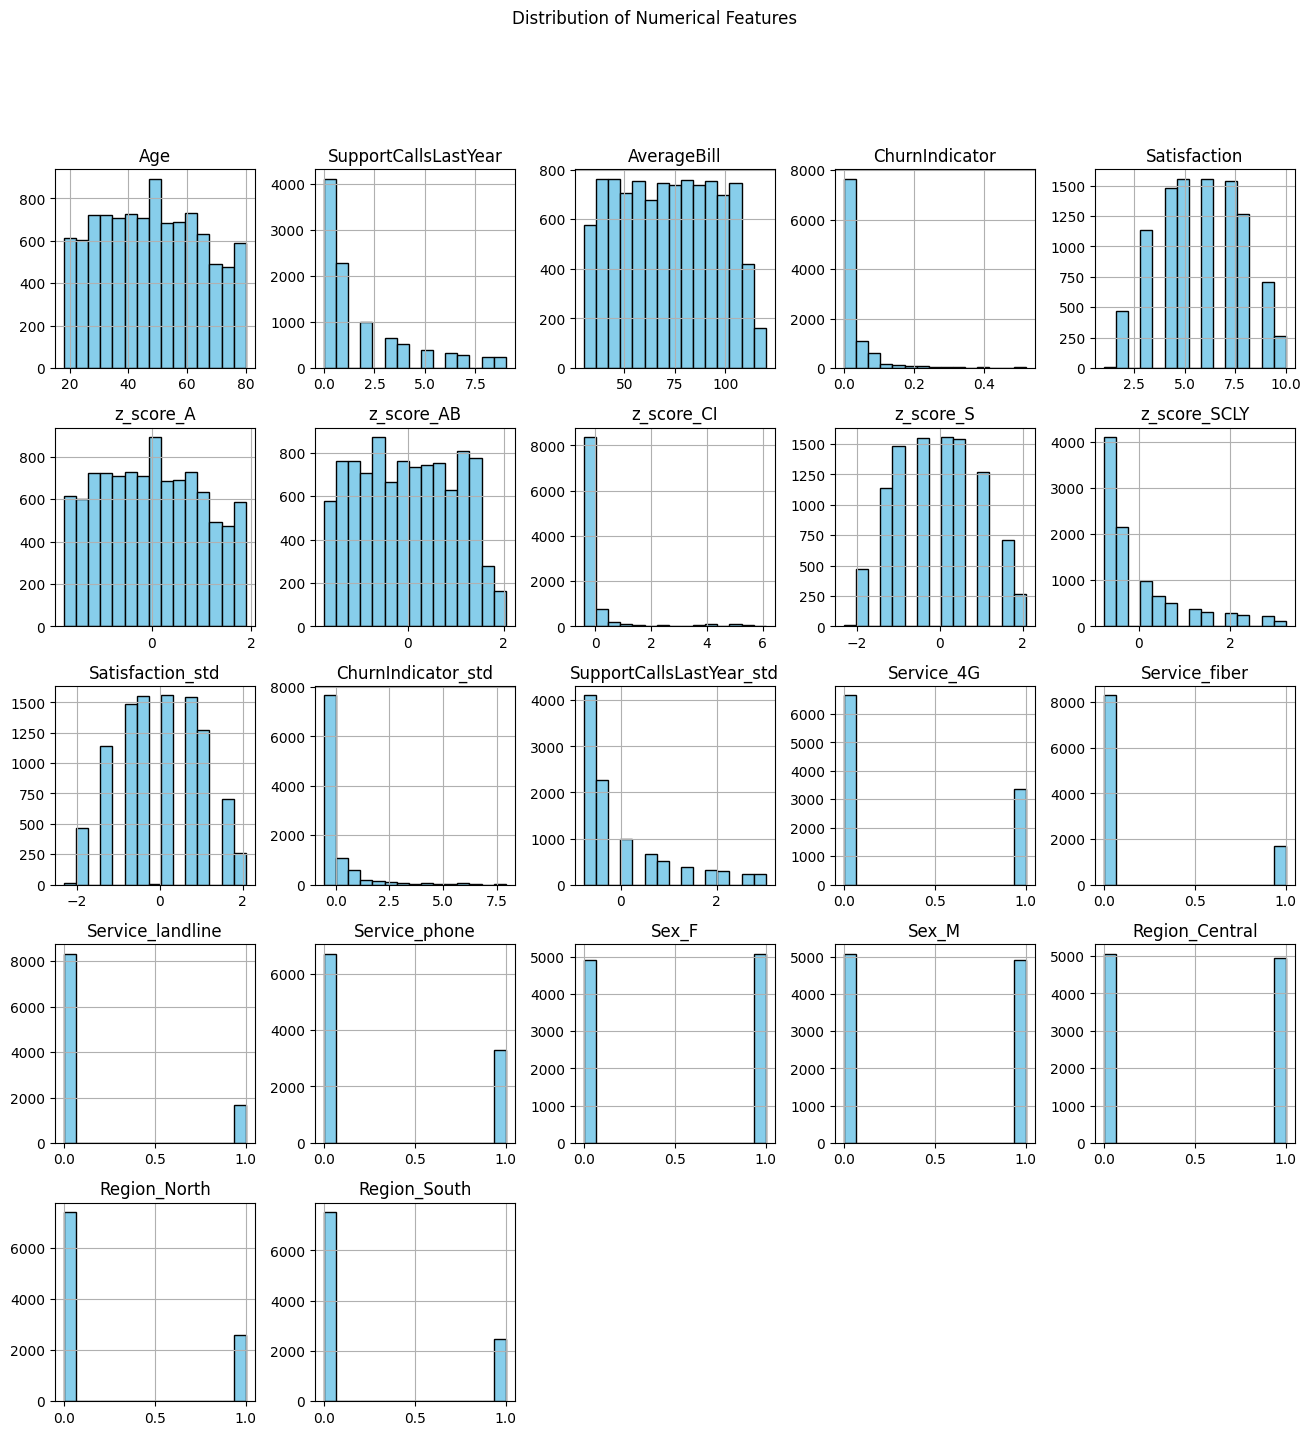

In [251]:
# Histograms of the dataframe's numerical features are plotted by the code
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=15, figsize=(16,16), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

## Descriptive Statistics

In [252]:
# Basic descriptive statistics for the dataframe’s are shown by the code.
print("BASIC DESCRIPTIVE STATISTICS")

df_desc = df.describe()
df_desc

BASIC DESCRIPTIVE STATISTICS


,Age,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,z_score_AB,z_score_CI,z_score_S,z_score_SCLY,...,SupportCallsLastYear_std,Service_4G,Service_fiber,Service_landline,Service_phone,Sex_F,Sex_M,Region_Central,Region_North,Region_South
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9.993000e+03,9.993000e+03,9.993000e+03,9.993000e+03,9.993000e+03,...,9.993000e+03,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,47.956670,1.812068,71.505105,0.033259,5.737564,1.137665e-16,1.340311e-16,-2.275329e-17,-1.734939e-16,-1.884257e-17,...,7.074853e-17,0.334534,0.169519,0.166717,0.329230,0.507855,0.492145,0.493646,0.259181,0.247173
std,16.963456,2.382614,23.760614,0.061488,2.051135,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000050e+00,0.471851,0.375228,0.372741,0.469957,0.499963,0.499963,0.499985,0.438207,0.431390
min,18.000000,0.000000,30.000000,0.000000,1.000000,-1.765953e+00,-1.746803e+00,-4.018206e-01,-2.309728e+00,-7.556503e-01,...,-7.605761e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,51.000000,0.010000,4.000000,-8.227492e-01,-8.629872e-01,-3.367761e-01,-8.471231e-01,-7.556503e-01,...,-7.605761e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,1.000000,72.000000,0.010000,6.000000,-5.639592e-02,2.082837e-02,-3.367761e-01,1.279468e-01,-3.596976e-01,...,-3.408480e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,3.000000,92.000000,0.030000,7.000000,8.278579e-01,8.625575e-01,-1.416425e-01,6.154818e-01,4.322077e-01,...,4.986083e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,80.000000,9.000000,120.000000,0.520000,10.000000,1.888962e+00,2.040978e+00,6.102632e+00,2.078087e+00,3.203876e+00,...,3.016977e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [253]:
# The code computes other statistics like median, mode, variance, and standard deviation.
print("OTHER STATS:")
df_stats = pd.DataFrame()
df_stats['Median'] = df.median(numeric_only=True)
df_stats['Mode'] = df.mode().iloc[0]
df_stats['Variance'] = df.var(numeric_only=True)
df_stats['Standard Deviation'] = df.std(numeric_only=True)
df_stats

OTHER STATS:


,Median,Mode,Variance,Standard Deviation
Age,47.000000,65,287.758831,16.963456
SupportCallsLastYear,1.000000,0.0,5.676848,2.382614
AverageBill,72.000000,43.0,564.566777,23.760614
ChurnIndicator,0.010000,0.01,0.003781,0.061488
Satisfaction,6.000000,6.0,4.207155,2.051135
z_score_A,-0.056396,1.004709,1.000000,1.000000
is_outlier_A,0.000000,False,0.000000,0.000000
z_score_AB,0.020828,-1.199679,1.000000,1.000000
is_outlier_AB,0.000000,False,0.000000,0.000000
z_score_CI,-0.336776,-0.336776,1.000000,1.000000
